In [1]:
import random
import logging

import rich

import networkx

In [2]:
from twon_lss.simulations.bcm import (
    Simulation,
    SimulationArgs,
    Ranker,
    Agent,
)

from twon_lss.schemas import Post, User, Feed, Network

In [3]:
logging.getLogger().setLevel(logging.DEBUG)

In [4]:
NUM_AGENTS: int = 25
NUM_NEIGHBORS: int = 8

ARGS = SimulationArgs(num_steps=20, num_posts_to_interact_with=1)

In [5]:
RANKER = Ranker()
rich.print(RANKER)

Ranker(
    args=RankerArgs(weights=RankerInterfaceWeights(network=1.0, individual=1.0), noise=Noise(low=0.8, high=1.2)),
    type='random'
)

In [6]:
USERS = [User() for _ in range(NUM_AGENTS)]
rich.print(USERS)

[
    User(id='user-3c412d51-6302-4493-878a-84d6e4123a55'),
    User(id='user-5626eafe-6b9e-496d-8a96-52f51200b747'),
    User(id='user-e3685113-724d-4f46-8dc9-47de4591b0d4'),
    User(id='user-1a3a0939-9b1a-487e-9b6a-7c1ed270ba24'),
    User(id='user-1481e18f-eaa4-40de-a16f-6422421463ff'),
    User(id='user-0278d905-060a-404a-ac7e-35371434d142'),
    User(id='user-7108a332-e9b3-477b-8450-fa85325d1d2e'),
    User(id='user-c19b3363-1b52-4676-98cc-e69d565228dd'),
    User(id='user-a432fa3d-1abf-443e-a797-3eb4a777070b'),
    User(id='user-6622404a-8835-4e4f-903a-fae3a38b9581'),
    User(id='user-84df1776-3be5-4dc7-b84d-38e73e608e95'),
    User(id='user-582d332b-e144-4c3b-8e4a-56a6e58442d3'),
    User(id='user-d94b4a22-7222-4f19-b012-b2d0a22c3dc1'),
    User(id='user-d1c39273-33e0-4e84-b045-ceff89bf0eb2'),
    User(id='user-0ddfb282-5a3e-4102-b096-8e870dd4441a'),
    User(id='user-9d4a17b3-1312-4766-b2ee-4f65b49e859c'),
    User(id='user-14ec5da5-3e30-4ca3-a406-189fb83f0c73'),
    User(id='user-03a22961-11c9-4b52-bc5d-97b91937e6b3'),
    User(id='user-b50ee299-11b5-4e2c-8da4-9cf1f0d826a7'),
    User(id='user-8ec1a6f7-9d97-402b-ac0e-7c660863721e'),
    User(id='user-04759899-5888-4e6b-ae32-21fe781d0a2e'),
    User(id='user-2de78e21-0c71-4407-8493-2baf02c8f5c3'),
    User(id='user-fce89985-f62b-44d6-b50c-f5b45283cff6'),
    User(id='user-fc58834f-6ac0-4653-a16e-4963e46e9cf0'),
    User(id='user-18acdd35-9110-4a93-abcc-f2aea1a186dc')
]

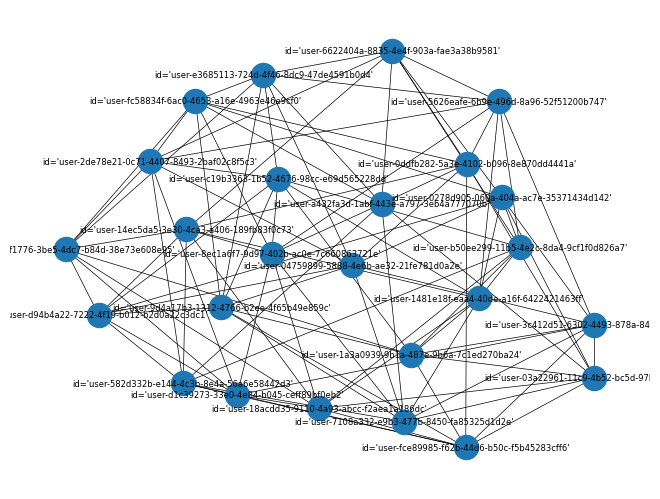

In [7]:
NETWORK = Network.from_graph(networkx.random_regular_graph(NUM_NEIGHBORS, len(USERS)), USERS)
networkx.draw(NETWORK.root, with_labels=True, width=0.5, font_size=6)

In [8]:
FEED = Feed(
    [
        Post(user=user, content=str(random.uniform(-1.0, 1.0)))
        for user in USERS
    ]
)
rich.print(FEED[:3])

[
    Post(
        user=User(id='user-3c412d51-6302-4493-878a-84d6e4123a55'),
        content='0.9819815408921322',
        reads=[],
        likes=[],
        id='post-5d65fc36-a4fd-47fc-9bfd-4cf96a730d4e',
        timestamp=0
    ),
    Post(
        user=User(id='user-5626eafe-6b9e-496d-8a96-52f51200b747'),
        content='0.9163287878840689',
        reads=[],
        likes=[],
        id='post-12fd556d-0f56-4d11-bb31-0ee107551494',
        timestamp=0
    ),
    Post(
        user=User(id='user-e3685113-724d-4f46-8dc9-47de4591b0d4'),
        content='-0.17849522344313873',
        reads=[],
        likes=[],
        id='post-34510d56-3f59-47c3-9d3c-f75d191f101b',
        timestamp=0
    )
]

In [9]:
INDIVIDUALS = {
    user: Agent(
        memory=[float(post.content)],
        eps=2.0,
        delta=0.1,
    )
    for user, post in zip(
        USERS, FEED.root, strict=False
    )
}
rich.print(INDIVIDUALS)

{
    User(id='user-3c412d51-6302-4493-878a-84d6e4123a55'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.9819815408921322],
        memory_length=4
    ),
    User(id='user-5626eafe-6b9e-496d-8a96-52f51200b747'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.9163287878840689],
        memory_length=4
    ),
    User(id='user-e3685113-724d-4f46-8dc9-47de4591b0d4'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.17849522344313873],
        memory_length=4
    ),
    User(id='user-1a3a0939-9b1a-487e-9b6a-7c1ed270ba24'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.19251788314686102],
        memory_length=4
    ),
    User(id='user-1481e18f-eaa4-40de-a16f-6422421463ff'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.8737914044049195],
        memory_length=4
    ),
    User(id='user-0278d905-060a-404a-ac7e-35371434d142'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.2803142779754533],
        memory_length=4
    ),
    User(id='user-7108a332-e9b3-477b-8450-fa85325d1d2e'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.21285257015873893],
        memory_length=4
    ),
    User(id='user-c19b3363-1b52-4676-98cc-e69d565228dd'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.37931222267879106],
        memory_length=4
    ),
    User(id='user-a432fa3d-1abf-443e-a797-3eb4a777070b'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.06745418521516466],
        memory_length=4
    ),
    User(id='user-6622404a-8835-4e4f-903a-fae3a38b9581'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.6098860834816267],
        memory_length=4
    ),
    User(id='user-84df1776-3be5-4dc7-b84d-38e73e608e95'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.1685709211254114],
        memory_length=4
    ),
    User(id='user-582d332b-e144-4c3b-8e4a-56a6e58442d3'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.8636415932458865],
        memory_length=4
    ),
    User(id='user-d94b4a22-7222-4f19-b012-b2d0a22c3dc1'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.9092293404717822],
        memory_length=4
    ),
    User(id='user-d1c39273-33e0-4e84-b045-ceff89bf0eb2'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.3191926954276001],
        memory_length=4
    ),
    User(id='user-0ddfb282-5a3e-4102-b096-8e870dd4441a'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7230094697920553],
        memory_length=4
    ),
    User(id='user-9d4a17b3-1312-4766-b2ee-4f65b49e859c'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.7263769216752711],
        memory_length=4
    ),
    User(id='user-14ec5da5-3e30-4ca3-a406-189fb83f0c73'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.2634323518343211],
        memory_length=4
    ),
    User(id='user-03a22961-11c9-4b52-bc5d-97b91937e6b3'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.29046720451769836],
        memory_length=4
    ),
    User(id='user-b50ee299-11b5-4e2c-8da4-9cf1f0d826a7'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.22378110752194313],
        memory_length=4
    ),
    User(id='user-8ec1a6f7-9d97-402b-ac0e-7c660863721e'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.14731843657456523],
        memory_length=4
    ),
    User(id='user-04759899-5888-4e6b-ae32-21fe781d0a2e'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.6842783171342044],
        memory_length=4
    ),
    User(id='user-2de78e21-0c71-4407-8493-2baf02c8f5c3'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[0.6923305210976354],
        memory_length=4
    ),
    User(id='user-fce89985-f62b-44d6-b50c-f5b45283cff6'): Agent(
        eps=2.0,
        delta=0.1,
        memory=[-0.333157656661059],
        memory_length=4
    ),
    User(id='user-fc58834f-6ac0-4653-a16e-4963e46e9cf0'): Agent(
        eps=2.0,
        delta

In [10]:
simulation = Simulation(
    args=ARGS,
    ranker=RANKER,
    individuals=INDIVIDUALS,
    network=NETWORK,
    feed=FEED,
)

DEBUG:root:>f init simulation


In [11]:
simulation()

Output()

DEBUG:root:>f simulate step n=0
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=1
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=2
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=3
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=4
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=5
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=6
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=7
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=8
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=9
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=10
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=11
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=12
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=13
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=14
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=15
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=16
DEBUG:root:len(feed)=25
DEBUG:root:>f simulate step n=17
DEBUG:ro